Дана статистика пользователей adult.csv.  
Получите значения AUC для различных моделей и их параметров.  
Используйте как минимум 3 различные модели классификации.  
Решением будет ссылка на гитхаб с ноутбуком.  

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Дана статистика пользователей adult.csv.

In [2]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# data.workclass.value_counts()
# data.education.value_counts()
# data.loc[:,'marital-status'].value_counts()   
# data.occupation.value_counts()
# data.relationship.value_counts()
# data.race.value_counts()
# data.gender.value_counts()
# data.loc[:,'native-country'].value_counts()

In [6]:
X_digit = data.drop('income', axis=1).select_dtypes(exclude=object)
X_cat =  data.drop('income', axis=1).select_dtypes(object)

In [7]:
# X_cat
# X_digit

In [8]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [9]:
ohe = OneHotEncoder(sparse=False)

In [10]:
X_cat_ohe = pd.DataFrame(ohe.fit_transform(X_cat))

In [11]:
X = pd.concat((X_digit,X_cat_ohe), axis=1)

In [12]:
le = LabelEncoder()

In [13]:
Y_le = le.fit_transform(data.income)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_le, test_size=0.75, random_state=42)

# Получите значения AUC для различных моделей и их параметров.
Используйте как минимум 3 различные модели классификации.

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
clf_lr = LogisticRegression(penalty='l1', C=0.1, solver='liblinear').fit(X_train, y_train)

In [20]:
predictions_lr = clf_lr.predict_proba(X_test)

In [21]:
tpr_lr, fpr_lr, _ = roc_curve(y_test, predictions_lr[:, 1])

In [22]:
roc_auc_score(y_test, predictions_lr[:, 1])

0.9057914239294623

In [23]:
np.average(cross_val_score(clf_lr,X_train, y_train, cv=5, scoring = 'roc_auc'))

0.8995797827765856

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
for i in range(20):
    print(i,np.average(cross_val_score(DecisionTreeClassifier(max_depth=i+1),X_train, y_train, cv=5, scoring = 'roc_auc')))

0 0.7541621847899769
1 0.8271430503669073
2 0.8581344123809268
3 0.8690241337566447
4 0.8787704275543581
5 0.8834056947291868
6 0.8837695962116339
7 0.8819417762951213
8 0.876257789077815
9 0.8733766876580681
10 0.8627918387696122
11 0.8497782031107727
12 0.8449651356338232
13 0.8335956883878909
14 0.827056338667832
15 0.8136167552698792
16 0.8038804935819284
17 0.7945902856302226
18 0.7894891018399182
19 0.7820934284028772


In [26]:
clf_dt = DecisionTreeClassifier(max_depth=8).fit(X_train, y_train)

In [27]:
predictions_dt = clf_dt.predict_proba(X_test)

In [28]:
tpr_dt, fpr_dt, _ = roc_curve(y_test, predictions_dt[:, 1])

In [29]:
roc_auc_score(y_test, predictions_dt[:, 1])

0.8934489316071826

In [30]:
np.average(cross_val_score(clf_dt,X_train, y_train, cv=5, scoring = 'roc_auc'))

0.8839647831453267

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
clf_rf = RandomForestClassifier(n_estimators=1000, n_jobs=-1).fit(X_train, y_train)

In [33]:
predictions_rf = clf_rf.predict_proba(X_test)

In [34]:
tpr_rf, fpr_rf, _ = roc_curve(y_test, predictions_rf[:, 1])

In [35]:
roc_auc_score(y_test, predictions_rf[:, 1])

0.9032650936725994

In [36]:
np.average(cross_val_score(clf_rf,X_train, y_train, cv=5, scoring = 'roc_auc'))

0.8969459493051513

In [37]:
from sklearn.ensemble import AdaBoostClassifier

In [38]:
clf_adb = AdaBoostClassifier().fit(X_train, y_train)

In [39]:
predictions_adb = clf_adb.predict_proba(X_test)

In [40]:
tpr_adb, fpr_adb, _ = roc_curve(y_test, predictions_adb[:, 1])

In [41]:
roc_auc_score(y_test, predictions_adb[:, 1])

0.915496239415588

In [42]:
np.average(cross_val_score(clf_adb,X_train, y_train, cv=5, scoring = 'roc_auc'))

0.9094122227060973

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
params = [ {'n_neighbors' : list(range(1,10)), 'leaf_size' : list(range(30,32))} ]

In [46]:
gs = GridSearchCV(KNeighborsClassifier(), param_grid=params, scoring='roc_auc',return_train_score = False)

In [47]:
gs.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'leaf_size': [30, 31],
                          'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
             scoring='roc_auc')

In [48]:
gs.cv_results_

{'mean_fit_time': array([0.44660268, 0.42699971, 0.42020059, 0.44140244, 0.42372928,
        0.4302371 , 0.44091644, 0.42660065, 0.44499931, 0.4444068 ,
        0.45020223, 0.42660413, 0.39780369, 0.40020089, 0.39959993,
        0.39860477, 0.4042079 , 0.40140505]),
 'std_fit_time': array([0.01885132, 0.01009917, 0.0126048 , 0.02199655, 0.0083766 ,
        0.01279586, 0.02881848, 0.01236937, 0.01178029, 0.01364485,
        0.01524956, 0.01384932, 0.00278535, 0.00825553, 0.00467421,
        0.00185373, 0.00549155, 0.00313458]),
 'mean_score_time': array([0.13939991, 0.137602  , 0.1366025 , 0.14380603, 0.14221115,
        0.14900603, 0.15599847, 0.14780059, 0.15600333, 0.13580379,
        0.15000124, 0.14119949, 0.1348033 , 0.14220214, 0.13380303,
        0.13520074, 0.13740087, 0.13820043]),
 'std_score_time': array([0.00870916, 0.00898032, 0.0052385 , 0.00407239, 0.00712213,
        0.01399368, 0.00900921, 0.00636933, 0.00914335, 0.00762635,
        0.0137232 , 0.0074691 , 0.00324638, 

In [66]:
gs.best_params_

{'leaf_size': 30, 'n_neighbors': 6}

In [81]:
clf_knn = KNeighborsClassifier(n_neighbors=gs.best_params_.get('n_neighbors'),
                               leaf_size=gs.best_params_.get('leaf_size')).fit(X_train, y_train)

In [82]:
predictions_knn = clf_knn.predict_proba(X_test)

In [83]:
tpr_knn, fpr_knn, _ = roc_curve(y_test, predictions_knn[:, 1])

In [84]:
roc_auc_score(y_test, predictions_knn[:, 1])

0.6327183432206627

In [85]:
np.average(cross_val_score(clf_knn,X_train, y_train, cv=5, scoring = 'roc_auc'))

0.6354085200040259

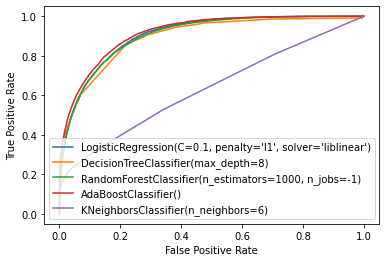

In [86]:
plt.plot(tpr_lr, fpr_lr, label=clf_lr)
plt.plot(tpr_dt, fpr_dt, label=clf_dt)
plt.plot(tpr_rf, fpr_rf, label=clf_rf)
plt.plot(tpr_adb, fpr_adb, label=clf_adb)
plt.plot(tpr_knn, fpr_knn, label=clf_knn)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()